<a href="https://colab.research.google.com/github/Regina1832/Acronyms/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  pandas as  pd

In [3]:
dataset = pd.read_csv('test.csv')

df = pd.DataFrame(dataset) 
df.head()

,F1,F2,F3,F4,target
0,a1,10,50,12,1
1,a2,12,110,11,1
2,a3,13,90,12,1
3,a4,86,35,7,1
4,a5,10,70,9,1


In [4]:
import  matplotlib.pyplot as plt

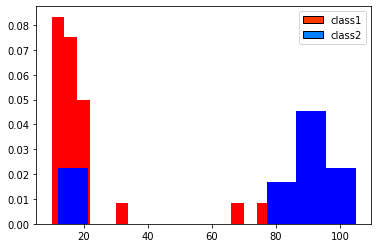

In [5]:
plt.hist(df[0:30].F2  , bins='auto'  ,color='r',density=True);
plt.hist(df[31: ].F2 , bins='auto'  ,color='b',density=True);

from matplotlib.patches import Rectangle
cc = plt.get_cmap('jet')
h = [Rectangle((0,0),1,1,color=c,ec="k") for c in [cc(0.85),cc(0.25)]]

plt.legend(h , ["class1","class2"]);

In [6]:
C1   = df[0:30].F3
C2   = df[31: ].F3
data =[C1 ,C2]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


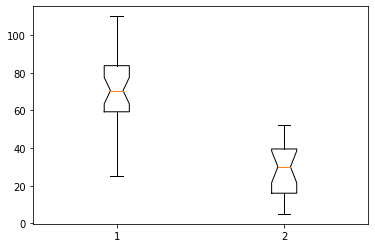

In [7]:
plt.boxplot(data, notch=True , showfliers=False );     #, patch_artist=True

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


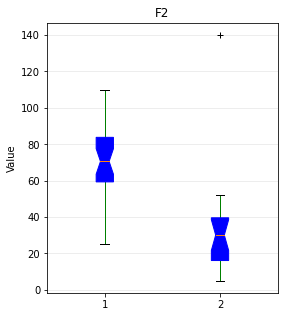

In [8]:
fig, ax1 = plt.subplots(figsize=(8, 5))
fig.subplots_adjust(left=0.5, right=0.9, top=1, bottom=0.25)

bp = plt.boxplot(data, patch_artist=True, notch=True, vert=1, whis=2) #,  sym='w'

plt.setp( bp['boxes']    , color='b')
plt.setp( bp['whiskers'] , color='g')
plt.setp( bp['fliers']   , color='r', marker='+')


ax1.set_title('F2')
ax1.set_ylabel('Value')
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)


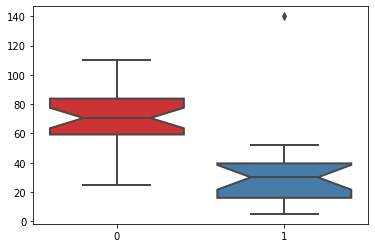

In [9]:
import seaborn as s
ax = s.boxplot(data=data , linewidth=2 , notch=True , palette="Set1" ) 
#ax = s.swarmplot(data=data, color="0.25")

In [10]:
dfd = df.drop( ['F1'] , axis=1 )

In [11]:
X = dfd.drop( ['target'] , axis = 1 )
y = dfd['target'] 

In [12]:
from  sklearn.linear_model      import  LogisticRegression
from  sklearn.neural_network    import  MLPClassifier
from  sklearn                   import  svm
from  sklearn.svm               import  SVC
from  sklearn.tree              import  DecisionTreeClassifier

In [13]:
LR  = LogisticRegression(solver='lbfgs' , random_state=0 , C=0.3, penalty='l2')
#MLP = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(1) , alpha=1e-5, random_state=1) 
#SVM = SVC(C=1, kernel = 'rbf', random_state = 0, gamma='scale')    
#SVM = SVC(kernel='linear', C=1)  
#SVM = SVC(kernel='poly', degree=2, C=0.5, gamma='scale')   
#DT  = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
Xtrain.shape

(35, 3)

In [17]:
ytest.shape

(15,)

In [18]:
ytest

28    1
11    1
10    1
41    0
2     1
27    1
38    0
31    0
22    1
4     1
33    0
35    0
26    1
34    0
18    1
Name: target, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(Xtrain)  
Xtrain = scaler.transform(Xtrain)  
Xtest  = scaler.transform(Xtest) 

In [20]:
LR.fit (Xtrain , ytrain);
#MLP.fit(Xtrain , ytrain) 
#SVM.fit(Xtrain , ytrain)
#DT.fit (Xtrain , ytrain)


In [21]:
ypLR   = LR.predict(Xtest)
#ypMLP  = MLP.predict(Xtest)
#ypSVM  = SVM.predict(Xtest)
#ypDT   = DT.predict(Xtest)

In [22]:
from  sklearn.metrics   import  classification_report

In [23]:
print(classification_report(ytest, ypLR , target_names=['CLASS2', 'CLASS1'] ))

              precision    recall  f1-score   support

      CLASS2       1.00      0.50      0.67         6
      CLASS1       0.75      1.00      0.86         9

    accuracy                           0.80        15
   macro avg       0.88      0.75      0.76        15
weighted avg       0.85      0.80      0.78        15



In [24]:
from  sklearn.metrics   import  confusion_matrix

In [25]:
confusion_matrix(ytest, ypLR)

array([[3, 3],
       [0, 9]])

In [26]:
tn, fp, fn, tp = confusion_matrix(ytest, ypLR).ravel()
tn, fp, fn, tp

(3, 3, 0, 9)

In [27]:
LR.score(Xtrain , ytrain)   
#SVM.score(Xtrain , ytrain)   
#MLP.score(Xtrain , ytrain)   
#DT.score (Xtrain , ytrain)  

0.8857142857142857

In [28]:
LR.score(Xtest , ytest)    #accuracy_score(ytest, ypLR)
#MLP.score(Xtest , ytest)  
#SVM.score(Xtest , ytest)    
#DT.score (Xtest , ytest)   

0.8

In [29]:
import  numpy  as  np

In [30]:
from  sklearn.model_selection   import  cross_val_score

In [31]:
np.mean(cross_val_score(LR , X , y , cv=10))    
#np.mean(cross_val_score(MLP , X , y , cv=10))    
#np.mean(cross_val_score(DT  , X , y , cv=10))    
#np.mean(cross_val_score(SVM , X , y , cv=10)) 

0.8800000000000001

In [32]:
from  sklearn.metrics  import  roc_curve, auc
from  sklearn.model_selection   import  StratifiedKFold
from  scipy  import  interp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if sys.path[0] == '':
/usr/local/lib/

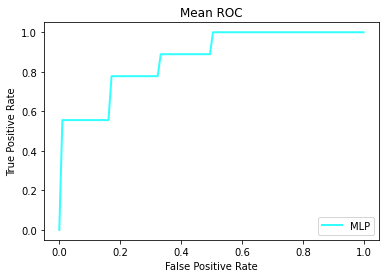

In [34]:
cv = StratifiedKFold(n_splits = 6)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

for train, test in cv.split(X, y):
    cf = LR.fit(Xtrain, ytrain)
    probas_ = cf.predict_proba(Xtest)
    fpr, tpr, thresholds = roc_curve(ytest, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    i += 1    
    
            
mean_tpr      = np.mean(tprs, axis=0)
mean_tpr[-1]  = 1.0
mean_auc      = auc(mean_fpr, mean_tpr)
std_auc       = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='cyan',label=r'MLP' ,lw=2, alpha=.8)
std_tpr    = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Mean ROC')
plt.legend(loc="lower right");

